In [0]:
# we will perform analysis on titanic data and try to find survival rate
# loading necessary files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
data = sns.load_dataset('titanic')
# loading top 10 rows
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [68]:
# We can here embarked and embark_town are providing same information , similarly pclass and class are giving same information. 
# so we should remove one of those to remove depulicacy

data = data.drop(['embarked','class'],axis=1)
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,child,False,NaN,Cherbourg,yes,False


In [38]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we can see age has count 714 unlike other columns , ie. aga has less data, further age min value is .42, means baby is allso present on ship and max age is
80 means also old people were also present on ship, further in fare column we can see min fare is 0 rupess which is not possible, may same data is missing,
while max fare is 512.33

In [39]:
# lets get count of number of survival
print(data.survived.value_counts())

0    549
1    342
Name: survived, dtype: int64


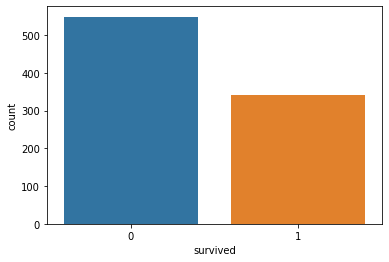

In [40]:
# thus we can see survived people are much less than people who did not survived.
# lets visualise same 
sns.countplot(x=data['survived'],data=data)

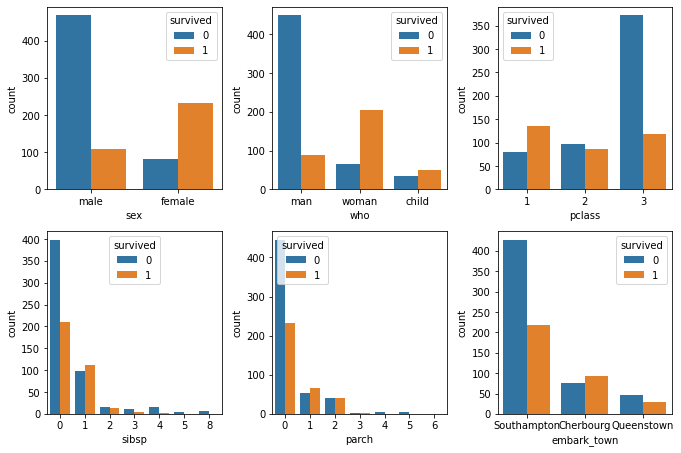

In [41]:
# visualise the count of survivors using various avaliable columns ie. 'sex','who','pclass,'sibsp','parch','embark_town'

cols = ['sex','who','pclass','sibsp','parch','embark_town']
n_rows=2
n_cols=3
fig,axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))
for row in range(0,n_rows):
  for col in range(0,n_cols):
    indx = row*n_cols+col
    ax =axs[row][col]
    sns.countplot(data[cols[indx]],data=data,hue=data['survived'],ax=ax)
    # ax.set_title(cols[indx])
    # plt.xlabel(cols[indx])
plt.tight_layout()


in first figure we can conclude female survival rate is muc higher than man, in second figure we can see woman has higher survival rate then child and then man
in third figure we can see for 1st class survival rate is higher than other class, in sibsp class for sibsp=1, survial rate is higher,
for embark_town, in cherbourg survival rate is high    

In [42]:
# look at survival rate by sex

data.groupby('sex')[['survived']].mean()


,survived
sex,
female,0.742038
male,0.188908


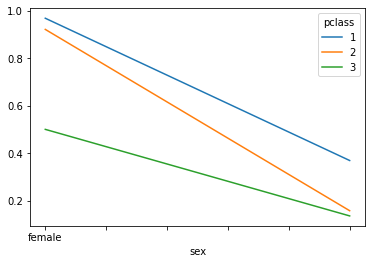

In [43]:
# lets visualise using survival rate by sex and class
data.pivot_table(values='survived',index='sex',columns='pclass')
data.pivot_table(values='survived',index='sex',columns='pclass').plot()

survival rate for female of first class is higher then second followed by third, same is case for male


In [44]:
# look at survival rate by class,sex,age
age = pd.cut(data['age'],[0,18,50,80])
data.pivot_table('survived',['sex',age],'pclass') 

pclass                  1         2         3
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 50]  0.967213  0.912281  0.413793
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 50]  0.442857  0.069444  0.139896
       (50, 80]  0.192308  0.083333  0.000000

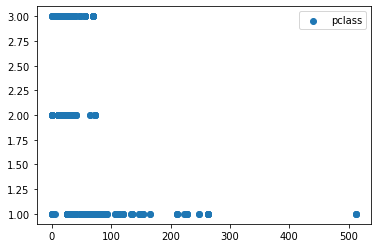

In [45]:
# Plot price paid of each class
plt.scatter('fare','pclass',data=data)
plt.legend()

In [46]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

age,deck,embark_town have missing value


In [47]:
# let see value of as per category in each column
for val in data:
  print(data[val].value_counts())

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
no     549
yes    3

In [0]:
# drop column
data.drop(['deck','alive','who','alone','adult_male'],axis=1,inplace=True)

In [0]:
data['embark_town'] = data['embark_town'].map({'Southampton':'S','Cherbourg':'C','Queenstown':'Q'})

In [0]:
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
data['age'] = data['age'].fillna(int(data['age'].mean()))

In [72]:
data.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embark_town     object
dtype: object

In [73]:
sex_value = pd.get_dummies(data['sex'],drop_first=True)
data['male'] = sex_value
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
5,0,3,male,29.0,0,0,8.4583,Q,1
6,0,1,male,54.0,0,0,51.8625,S,1
7,0,3,male,2.0,3,1,21.0750,S,1
8,1,3,female,27.0,0,2,11.1333,S,0
9,1,2,female,14.0,1,0,30.0708,C,0


In [74]:
data.drop(['sex'],inplace=True,axis=1)
data.head(10)

,survived,pclass,age,sibsp,parch,fare,embark_town,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
5,0,3,29.0,0,0,8.4583,Q,1
6,0,1,54.0,0,0,51.8625,S,1
7,0,3,2.0,3,1,21.0750,S,1
8,1,3,27.0,0,2,11.1333,S,0
9,1,2,14.0,1,0,30.0708,C,0


,survived,pclass,age,sibsp,parch,fare,embark_town
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.iloc[:,6] = le.fit_transform(data.iloc[:,6].values)
data.head(10)

,survived,pclass,age,sibsp,parch,fare,embark_town,male
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1
5,0,3,29.0,0,0,8.4583,1,1
6,0,1,54.0,0,0,51.8625,2,1
7,0,3,2.0,3,1,21.0750,2,1
8,1,3,27.0,0,2,11.1333,2,0
9,1,2,14.0,1,0,30.0708,0,0


In [76]:
data.dtypes

survived         int64
pclass           int64
age            float64
sibsp            int64
parch            int64
fare           float64
embark_town      int64
male             uint8
dtype: object

In [0]:
X = data.drop(['survived'],axis=1)
y = data['survived']

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [0]:
# create a function for many machine learning models
def models(x_train,y_train):

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(x_train,y_train)

  # KNeighbor
  from sklearn.neighbors import KNeighborsClassifier
  knn =KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
  knn.fit(x_train,y_train)

  # SVC (linear Kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear')
  svc_lin.fit(x_train,y_train)

  # SVC (RBF kernel)
  svc_rbf =SVC(kernel='rbf')
  svc_rbf.fit(x_train,y_train)

  # GuassianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(x_train,y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy')
  tree.fit(x_train,y_train)

  # RandomForest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(criterion='entropy',n_estimators=10)
  forest.fit(x_train,y_train)

  # Print taining accuracy
  print('[0] Logistic Regression Training Accuracy',log.score(x_train,y_train))
  print('[1] K Nearest neighbor Training Accuracy',knn.score(x_train,y_train))
  print('[2] SVC linear Training Accuracy',svc_lin.score(x_train,y_train))
  print('[3] SVC RBF Training Accuracy',svc_rbf.score(x_train,y_train))
  print('[4] Gaussian naive bayes Training Accuracy',gauss.score(x_train,y_train))
  print('[5] Decision Tree Training Accuracy',tree.score(x_train,y_train))
  print('[6] Random forest Training Accuracy',forest.score(x_train,y_train))


  return log,knn,svc_lin,svc_rbf,gauss,tree,forest

In [80]:
model = models(x_train,y_train)


[0] Logistic Regression Training Accuracy 0.7991573033707865
[1] K Nearest neighbor Training Accuracy 0.8679775280898876
[2] SVC linear Training Accuracy 0.7865168539325843
[3] SVC RBF Training Accuracy 0.8426966292134831
[4] Gaussian naive bayes Training Accuracy 0.7879213483146067
[5] Decision Tree Training Accuracy 0.9775280898876404
[6] Random forest Training Accuracy 0.9705056179775281


In [62]:
# Show the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix 

for i in range(len(model)):
  cm = confusion_matrix(y_test,model[i].predict(x_test))

  # Extract TN,FP,FN, TP
  TN , FP , FN , TP = confusion_matrix(y_test,model[i].predict(x_test)).ravel()

  accuracy = TN+TP/(TP+FP+FN+TN)
  print (cm)
  print('Model[{}] Testing Accuracy = {}'.format(i,accuracy))
  print()


[[99 11]
 [33 36]]
Model[0] Testing Accuracy = 99.20111731843575

[[92 18]
 [31 38]]
Model[1] Testing Accuracy = 92.2122905027933

[[97 13]
 [32 37]]
Model[2] Testing Accuracy = 97.20670391061452

[[99 11]
 [36 33]]
Model[3] Testing Accuracy = 99.18435754189944

[[95 15]
 [36 33]]
Model[4] Testing Accuracy = 95.18435754189944

[[99 11]
 [37 32]]
Model[5] Testing Accuracy = 99.17877094972067

[[92 18]
 [36 33]]
Model[6] Testing Accuracy = 92.18435754189944



In [81]:
# Get feature importances
forest = model[6]
importances = pd.DataFrame({'feature': data.iloc[:,1:8].columns, 'importance': np.round(forest.feature_importances_,3)} )
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.294
fare,0.278
male,0.219
pclass,0.079
sibsp,0.050
parch,0.040
embark_town,0.039


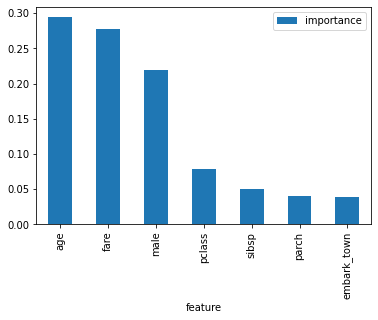

In [82]:
# Visualising importances
importances.plot.bar()

In [83]:
X.dtypes

pclass           int64
age            float64
sibsp            int64
parch            int64
fare           float64
embark_town      int64
male             uint8
dtype: object

In [93]:
# finding survival

input_data = [[0,34,1,1,100,2,1]]
input_data  = scaler.fit_transform(input_data)
pred = model[6].predict(input_data)

print(pred)
if pred ==0:
  print('oh no you didn\'t make')
else:
  print('you are saved')

[0]
oh no you didn't make
